<a href="https://colab.research.google.com/github/gabderrico05/Ciencia-de-Dados-e-Sistemas-Inteligentes/blob/main/Classificacao_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/drive')
caminho = '/content/drive/MyDrive/CDSI/Fonte_de_dados/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
base_risco_credito = pd.read_csv(caminho + 'risco_credito.csv')

In [4]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [5]:
x_risco_credito = base_risco_credito.iloc[:,0:4].values
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [6]:
y_risco_credito = base_risco_credito.iloc[:,4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [8]:
x_risco_credito[:,0] = label_encoder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_encoder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito[:,2] = label_encoder_garantia.fit_transform(x_risco_credito[:,2])
x_risco_credito[:,3] = label_encoder_renda.fit_transform(x_risco_credito[:,3])



In [9]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [10]:
import pickle
with open(caminho + 'risco_credito.pkl', mode = 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f)

In [12]:
from sklearn.naive_bayes import GaussianNB
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(x_risco_credito, y_risco_credito)

GaussianNB()

In [14]:
# Historia = boa(0), dívida = alta(0), garantia = nenhuma(1), renda = > 35(2)
# Historia = ruim(2), dívida = alta(0), garantia = adequada(0), renda = < 15(0)

previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [15]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [16]:
from sklearn.naive_bayes import BernoulliNB
naive_risco_credito_b = BernoulliNB()
naive_risco_credito_b.fit(x_risco_credito, y_risco_credito)

BernoulliNB()

In [19]:
# Historia = boa(0), dívida = alta(0), garantia = nenhuma(1), renda = > 35(2)
# Historia = ruim(2), dívida = alta(0), garantia = adequada(0), renda = < 15(0)

previsao_b = naive_risco_credito_b.predict([[0,0,1,2], [2,0,0,0]])

In [20]:
previsao_b

array(['baixo', 'alto'], dtype='<U8')

In [21]:
from sklearn.naive_bayes import MultinomialNB
naive_risco_credito_m = MultinomialNB()
naive_risco_credito_m.fit(x_risco_credito, y_risco_credito)

MultinomialNB()

In [22]:
# Historia = boa(0), dívida = alta(0), garantia = nenhuma(1), renda = > 35(2)
# Historia = ruim(2), dívida = alta(0), garantia = adequada(0), renda = < 15(0)

previsao_m = naive_risco_credito_m.predict([[0,0,1,2], [2,0,0,0]])

In [23]:
previsao_m

array(['baixo', 'alto'], dtype='<U8')

In [24]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [25]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [26]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

## Base - Credit Data

In [35]:
with open(caminho + 'credit.pkl', 'rb') as f:
  x_credito_treinamento, y_credito_treinamento, x_credito_teste, y_credito_teste = pickle.load(f)

In [36]:
x_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

In [37]:
x_credito_teste.shape, y_credito_teste.shape


((500, 3), (500,))

In [38]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credito_treinamento, y_credito_treinamento)

GaussianNB()

In [39]:
previsao_credit = naive_credit_data.predict(x_credito_teste)

In [40]:
previsao_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
accuracy_score(y_credito_teste, previsao_credit)

0.938

In [43]:
confusion_matrix(y_credito_teste, previsao_credit)

array([[428,   8],
       [ 23,  41]])

In [46]:
print(classification_report(y_credito_teste, previsao_credit))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



In [44]:
from yellowbrick.classifier import ConfusionMatrix

0.938

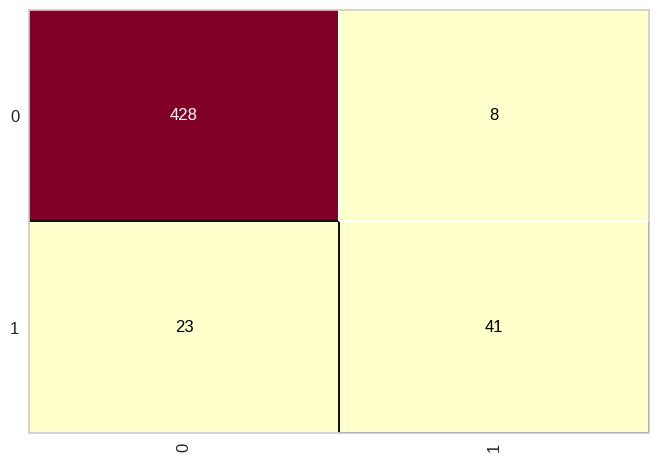

In [45]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credito_treinamento, y_credito_treinamento)
cm.score(x_credito_teste, y_credito_teste)

### Usando BernoliNB

In [47]:
naive_credit_data_b = BernoulliNB()
naive_credit_data_b.fit(x_credito_treinamento, y_credito_treinamento)


BernoulliNB()

In [48]:
previsao_credit_b = naive_credit_data_b.predict(x_credito_teste)

In [50]:
accuracy_score(y_credito_teste, previsao_credit_b)

0.872

0.872

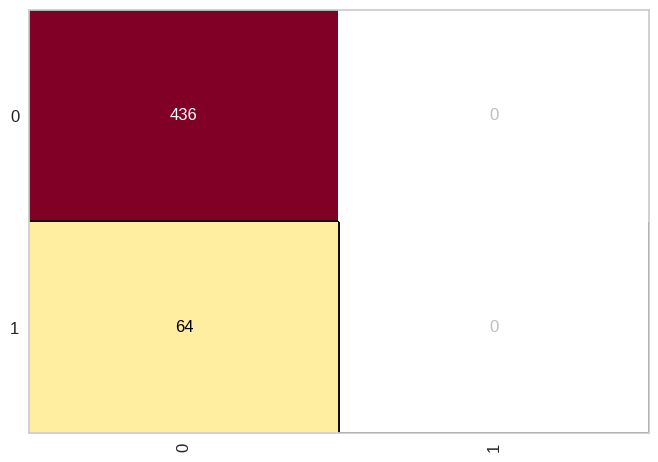

In [51]:
cm_b = ConfusionMatrix(naive_credit_data_b)
cm_b.fit(x_credito_treinamento, y_credito_treinamento)
cm_b.score(x_credito_teste, y_credito_teste)

In [52]:
print(classification_report(y_credito_teste, previsao_credit_b))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       436
           1       0.00      0.00      0.00        64

    accuracy                           0.87       500
   macro avg       0.44      0.50      0.47       500
weighted avg       0.76      0.87      0.81       500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Base Census

In [53]:
with open(caminho + 'census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [54]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [55]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [56]:
naive_census_data = GaussianNB()
naive_census_data.fit(x_census_treinamento, y_census_treinamento)

GaussianNB()

In [57]:
previsao_census = naive_census_data.predict(x_census_teste)
previsao_census

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [58]:
accuracy_score(y_census_teste, previsao_census)

0.4767656090071648

0.4767656090071648

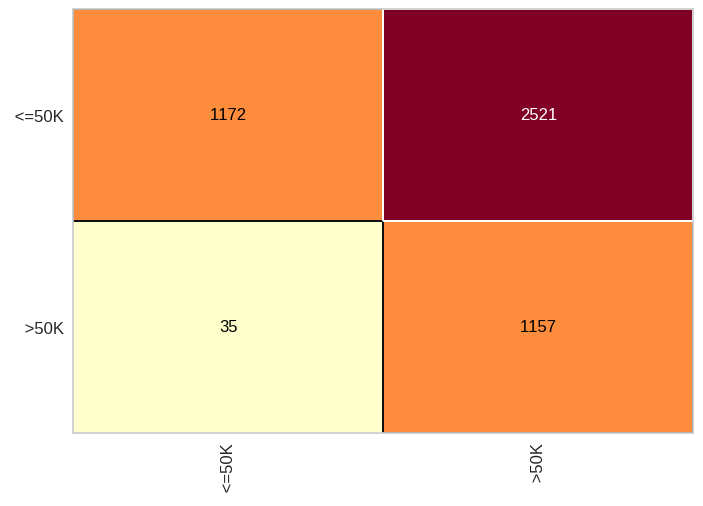

In [61]:
cm_census = ConfusionMatrix(naive_census_data)
cm_census.fit(x_census_treinamento, y_census_treinamento)
cm_census.score(x_census_teste, y_census_teste)

In [62]:
print(classification_report(y_census_teste, previsao_census))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



### Usando BernoliNB no Census

In [64]:
naive_census_data_b = BernoulliNB()
naive_census_data_b.fit(x_census_treinamento, y_census_treinamento)


BernoulliNB()

In [65]:
previsao_census_b = naive_census_data_b.predict(x_census_teste)

In [66]:
accuracy_score(y_census_teste, previsao_census_b)

0.7805527123848516

0.7805527123848516

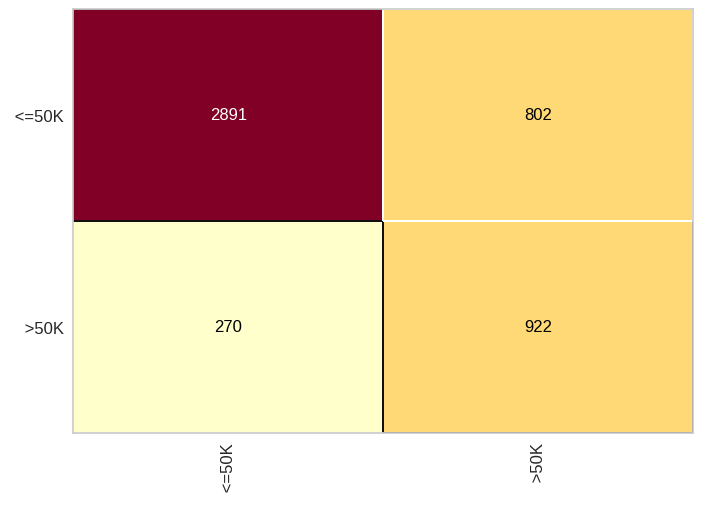

In [67]:
cm_census_b = ConfusionMatrix(naive_census_data_b)
cm_census_b.fit(x_census_treinamento, y_census_treinamento)
cm_census_b.score(x_census_teste, y_census_teste)

In [68]:
print(classification_report(y_census_teste, previsao_census_b))

              precision    recall  f1-score   support

       <=50K       0.91      0.78      0.84      3693
        >50K       0.53      0.77      0.63      1192

    accuracy                           0.78      4885
   macro avg       0.72      0.78      0.74      4885
weighted avg       0.82      0.78      0.79      4885

